In [296]:
import pandas as pd
import numpy as np
import plotly.express as px
import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
import tensorflow as tf
from sklearn.model_selection import GridSearchCV

In [206]:
heart_df = pd.read_csv("data/heart.csv")
heart_df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [207]:
#heart_df['female'] = heart_df['female'].map({'F': 1, 'M': 0})
heart_df['Sex'].replace('F',0 ,inplace=True)
heart_df['Sex'].replace('M', 1,inplace=True)
#Female is 0
#Male is 1

#ATA is 0
#NAP is 1
#ASY is 2
#TA is 3
heart_df['ChestPainType'].replace('ATA',0 ,inplace=True)
heart_df['ChestPainType'].replace('NAP',1 ,inplace=True)
heart_df['ChestPainType'].replace('ASY',2 ,inplace=True)
heart_df['ChestPainType'].replace('TA',3 ,inplace=True)

#Normal is 0
#St is 1
#LVH is 2
heart_df['RestingECG'].replace('Normal',0, inplace=True)
heart_df['RestingECG'].replace('ST',1, inplace=True)
heart_df['RestingECG'].replace('LVH',2, inplace=True)

#No is 0
#Yes is 1
heart_df['ExerciseAngina'].replace('N',0 ,inplace=True)
heart_df['ExerciseAngina'].replace('Y',1 ,inplace=True)

#ST_Slope
#Up is 0
#Flat is 1
#Down is 2
heart_df['ST_Slope'].replace('Up', 0, inplace = True)
heart_df['ST_Slope'].replace('Flat', 1, inplace = True)
heart_df['ST_Slope'].replace('Down', 2, inplace = True)

#My computer just crashed, sorry!
#np. Anthony is explaining scatter plots right now.

heart_df.head() #worky :)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,0,130,283,0,1,98,0,0.0,0,0
3,48,0,2,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0


In [208]:
heart_df.dropna(inplace=True)
heart_df.shape

(918, 12)

**NOTE:** PLEASE save the scores to the score dictionary 

Models to try out:

- Decision Tree \(Emma\)
- Random Forest
- NEURAL NETWORKS  Thomas
- 
- Logistic Regression
- 
- Naive Bayes \(Jeffrey and Rhone\)
- Adaboost
- Support vector classifier
- 
- 
- Support vector classifier 
- KNN

<u>**AlSO TRY OPTIMIZING THEM**</u>

Grid Search CV

Evaluation metrics:

- F1 score
- Accuracy
- Recall
- Precision
- Confusion matrix



In [209]:
scores = {}
scores['metrics'] = {'accuracy': 'accuracy', 'precision':'precision', 'recall':'recall', 'f1_score':'f1_score'}

In [282]:
target = heart_df["HeartDisease"]
input_columns = heart_df.loc[:, heart_df.columns != "HeartDisease"]
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.1)

In [76]:
x_train.shape

(734, 11)

In [77]:
KNN_model = KNN(n_neighbors = 7)
KNN_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [78]:
y_hat = KNN_model.predict(x_test)

[0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0
 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0
 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0
 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1]
[0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0
 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0
 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0
 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1]
0.266304347826087
{'accuracy': 0.7336956521739131, 'precision': 0.7336956521739131, 'recall': 0.7336956521739131, 'f1_score': 0.7336956521739132}


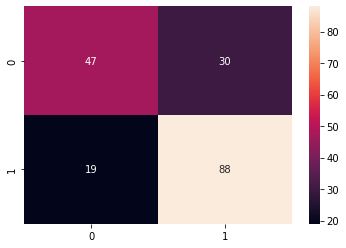

In [80]:
print(y_hat)
print(np.array(y_test))

total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat, average='micro')
recall = recall_score(y_test, y_hat, average='micro')
f1 = f1_score(y_test, y_hat, average='micro')
scores['KNN'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['KNN'])

/projects/d5a3aa23-997d-4ffc-977a-1dc20c583e62/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1
 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0
 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1]
[0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0
 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0
 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0
 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1]
0.14673913043478262


{'accuracy': 0.8532608695652174, 'precision': 0.8532608695652174, 'recall': 0.8532608695652174, 'f1_score': 0.8532608695652174}


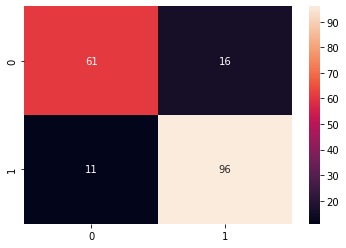

In [81]:
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(1000, 35), alpha=0.05, max_iter=200, random_state = 1, activation='relu', learning_rate='adaptive')
mlp.fit(x_train, y_train)
y_hat = mlp.predict(x_test)
print(y_hat)
print(np.array(y_test))
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat, average='micro')
recall = recall_score(y_test, y_hat, average='micro')
f1 = f1_score(y_test, y_hat, average='micro')
scores['mlp'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['mlp'])

In [22]:
# Please save scores like the example below
scores['knn'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}

IndentationError: unexpected indent (2760325245.py, line 2)

In [289]:
#x is everything but heart disease
x = heart_df.loc[:, heart_df.columns != "HeartDisease"]
#y is heart disease
y = heart_df['HeartDisease']
# splits dataset; 80 percent train: 20 percent test
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)
#scales down the x values
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)
classifier = LogisticRegression(random_state=0)
#Fits dataset
classifier.fit(x_train, y_train)
#gets predicted values
y_pred= classifier.predict(x_test)
#compares predictions to actual values
cm= confusion_matrix(y_pred, y_test)
print(cm)
"""total_squared_error = (np.sum((y_test - y_pred)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)"""
"""x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2,x3,x4,x5,x6,x7,x8,x9,x10,x11 classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Logistic Regression (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()""" 

[[60 11]
 [17 96]]


"x_set, y_set = x_train, y_train  \nx1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  \nnp.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  \nplt.contourf(x1, x2,x3,x4,x5,x6,x7,x8,x9,x10,x11 classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  \nalpha = 0.75, cmap = ListedColormap(('purple','green' )))  \nplt.xlim(x1.min(), x1.max())  \nplt.ylim(x2.min(), x2.max())  \nfor i, j in enumerate(np.unique(y_set)):  \n    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  \n        c = ListedColormap(('purple', 'green'))(i), label = j)  \nplt.title('Logistic Regression (Training set)')  \nplt.xlabel('Age')  \nplt.ylabel('Estimated Salary')  \nplt.legend()  \nplt.show()"

(826, 11)


1/3 [=========>....................] - ETA: 0s

3/3 [==============================] - 0s 2ms/step


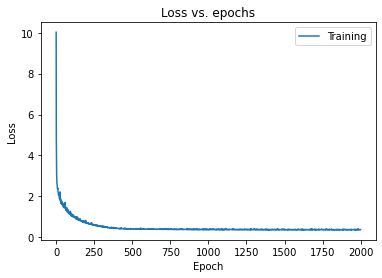

[1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
[1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0
 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


1/3 [=========>....................] - ETA: 0s - loss: 0.3400 - accuracy: 0.9062

3/3 [==============================] - 0s 5ms/step - loss: 0.4065 - accuracy: 0.8587


In [283]:
import copy
print(x_train.shape)
CNN = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(11,1)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.003)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.003)),
    tf.keras.layers.Dense(10)
])
CNN.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
CNN_history = CNN.fit(x_train, y_train, epochs=2000, verbose = False)
prediction = CNN.predict(x_test)
y_hat = []
for i in range(0,len(prediction)):
    prediction[i] = np.argmax(prediction[i])
for i in range(0,len(prediction)):
    y_hat.append(int(prediction[i][0]))
plt.plot(CNN_history.history['loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()
print(y_hat)
print(np.array(y_test))
test_loss, test_acc = CNN.evaluate(x_test,  y_test)

In [290]:
tree_model = tree.DecisionTreeClassifier(max_depth = 4)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [291]:
y_hat = tree_model.predict(x_test)
y_hat

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1])

In [292]:
total_squared_error = (np.sum((y_test - y_hat)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

0.19021739130434784


<AxesSubplot:>

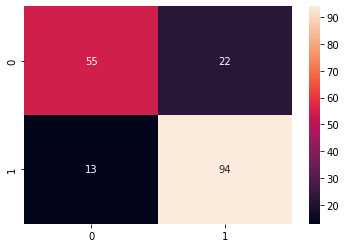

In [293]:
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [288]:
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
print(acc, prec, recall, f1)
scores['tree_model'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['tree_model'])

0.8369565217391305 0.9056603773584906 0.8275862068965517 0.8648648648648648
{'accuracy': 0.8369565217391305, 'precision': 0.9056603773584906, 'recall': 0.8275862068965517, 'f1_score': 0.8648648648648648}


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

0.8369565217391305 0.9056603773584906 0.8275862068965517 0.8648648648648648


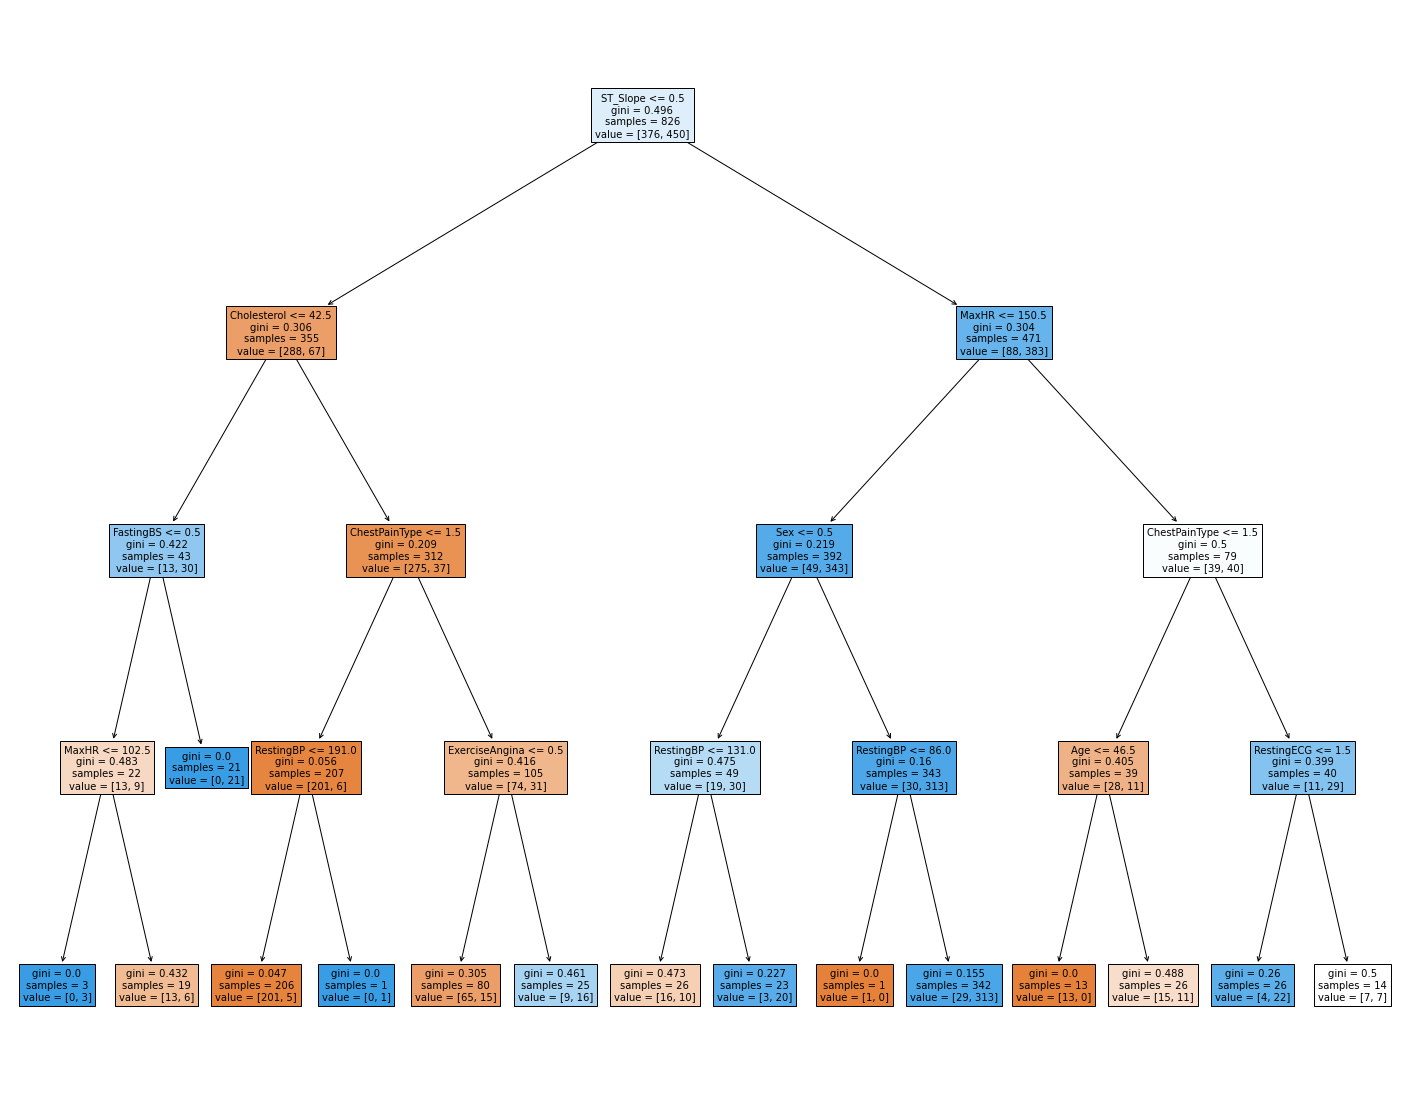

In [284]:
tree_model = tree.DecisionTreeClassifier(max_depth = 4)
tree_model.fit(x_train, y_train)
fig = plt.figure(figsize=(25,20))
tree_plot = tree.plot_tree(tree_model, feature_names=input_columns.columns, filled=True, fontsize=10)
y_hat = tree_model.predict(x_test)

acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
print(acc, prec, recall, f1)


In [319]:
array = np.arange(1,100)

In [320]:
param_grid = {'max_depth': array}
gs = GridSearchCV(DecisionTreeClassifier(),param_grid)
gs.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119])})

In [0]:
param_grid = {'max_depth': [1,2,3]}
gs = GridSearchCV(DecisionTreeClassifier(),param_grid)
gs.fit(x_train, y_train)

In [321]:
DecisionTreeClassifier(**gs.best_params_)

DecisionTreeClassifier(max_depth=4)

In [322]:
gs.best_params_

{'max_depth': 4}

In [323]:
gs.best_score_

0.8500792097660982

In [324]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [353]:
rf_model = RFC(n_estimators=37)
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=37)

In [354]:
y_hat = tree_model.predict(x_test)
y_hat

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1])

In [355]:
total_squared_error = (np.sum((y_test - y_hat)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

0.19021739130434784


<AxesSubplot:>

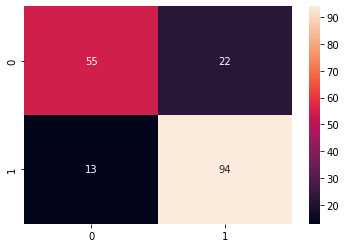

In [356]:
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [240]:
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
print(acc, prec, recall, f1)
scores['RFC'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['RFC'])

0.8804347826086957 0.8807339449541285 0.9142857142857143 0.8971962616822431
{'accuracy': 0.8804347826086957, 'precision': 0.8807339449541285, 'recall': 0.9142857142857143, 'f1_score': 0.8971962616822431}


In [349]:
array = np.arange(1, 50)


In [350]:

param_grid = {'n_estimators': array}
gs = GridSearchCV(RFC(),param_grid)
gs.fit(x_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [351]:
gs.best_params_

{'n_estimators': 37}

In [352]:
gs.best_score_

0.8773739632839437